# From Data to Viz

The purpose of this RECAP is to choose the right data visualization for a given question on a dataset.

(Freely inspired from https://www.data-to-viz.com/)

Let's start by running the following cell:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## A - Iris 🌸


Let's explore the Seaborn [**Iris**](https://github.com/mwaskom/seaborn-data/blob/master/iris.csv) dataset, quite known in the Machine Learning beginners community.

Here's a nice picture to get used to the vacobulary around those flowers:

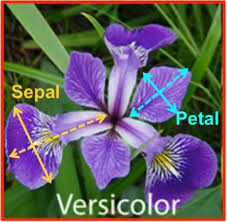

In [2]:
iris_df = sns.load_dataset('iris')
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


---

### ❓ 1 - Counting Species

How many different species are there in the dataset? Use a Seaborn plot to visualize their relative importance.

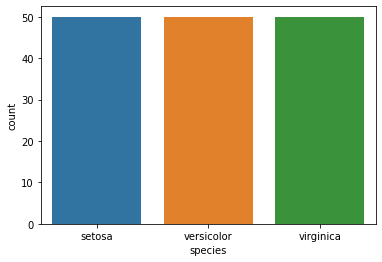

In [3]:
sns.countplot(x='species', data=iris_df);

---
### ❓ 2 - Petal Length distribution

Let's see if the petal distribution from the dataset is Normal or not. Use a Seaborn plot to visualize the distribution of the `petal_length` column of `iris_df`.

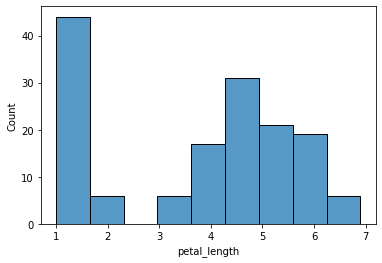

In [4]:
sns.histplot(x='petal_length', data=iris_df);

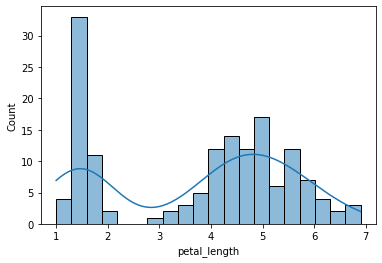

In [13]:
sns.histplot(x='petal_length', data=iris_df, bins=20, kde=True);

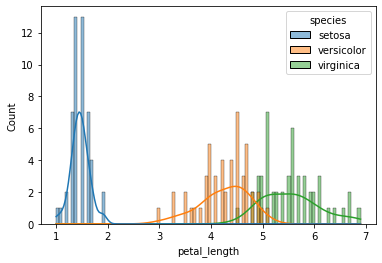

In [12]:
sns.histplot(x='petal_length', data=iris_df, bins=100, hue='species', kde=True);

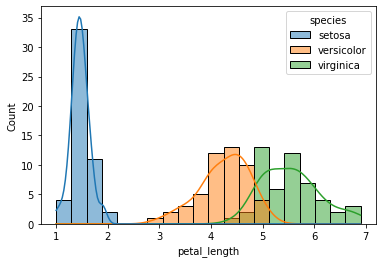

In [11]:
sns.histplot(x='petal_length', data=iris_df, bins=20, hue='species', kde=True);

---
### ❓ 3 - Relationships of Numerical variables

Let's use a Seaborn plot to quickly get a sense of the `(x, y)` relationship of all couples of numerical columns (`sepal_length` / `sepal_width`, `sepal_length` / `petal_length`, etc.). You should use a plot which will draw 16 subplots in one line of code!

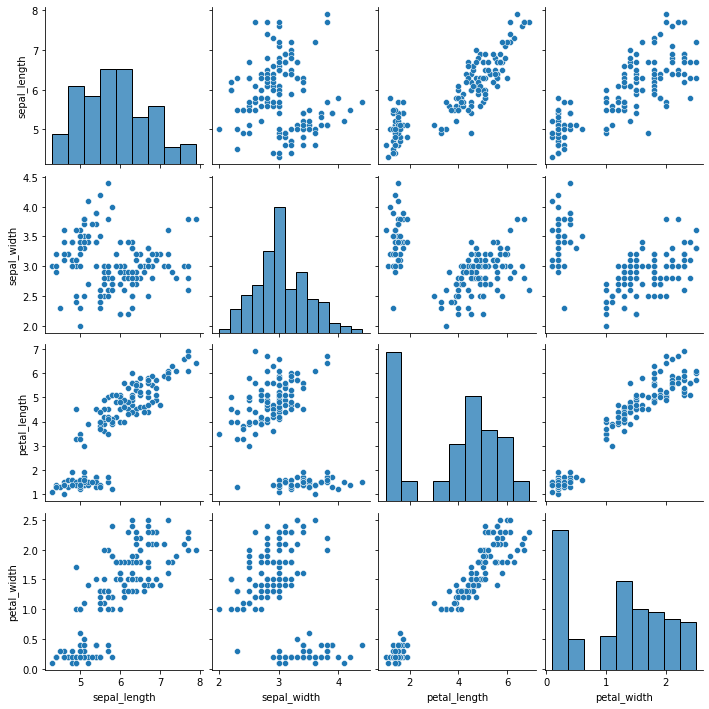

In [6]:
sns.pairplot(iris_df);

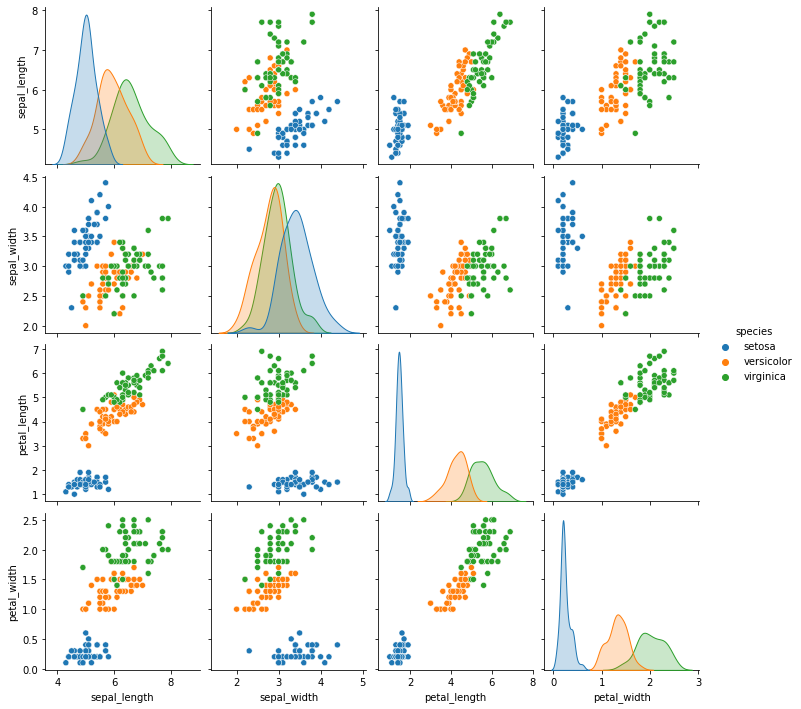

In [9]:
sns.pairplot(iris_df, hue='species');

---

### ❓ 4 - Numerical + Categorical

We learned a lot about this sample of irises:
- `petal_length` seems to be an important dimension to identify irises
- some of their dimensions are correlated
- there are 3 species
 
How can you visualize the differences between the 3 species of irises with different colors? Using Seaborn, write some code to get scatterplots (we want to use the `species` as colors to better identify groups!).

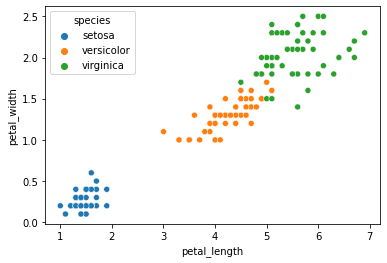

In [8]:
sns.scatterplot(x='petal_length', y='petal_width', data=iris_df, hue='species');

---
## B - Maps 🗺

😱 **Imagine a world where people can't go further than 100km from home**. How can you help them to know where they can go?


For this second part of the RECAP, we are using the [`folium`](https://python-visualization.github.io/folium/) package, a wrapper around the [`Leaflet`](https://leafletjs.com/) JavaScript library.

In [ ]:
# !pip install --quiet folium

Now import Folium:

In [14]:
import folium

---

### ❓ 1 - Draw your first map

The goal of this first question is to:

- Draw a map centered at specific coordinates (check out [gps-coorinates.net](https://www.gps-coordinates.net/))
- Put a marker at that specific point
- Draw a circle of 100km centered at specific point

Check out the [`folium` Quickstart](https://python-visualization.github.io/folium/quickstart.html), you should find all the code examples you need, good luck!

In [15]:
coords = [-22.9842335,-43.2100265]

In [19]:
m = folium.Map(location=coords, zoom_start=13)
m

In [22]:
folium.Marker(coords, popup="<i>Le Wagon Rio de Janeiro</i>", tooltip='click me').add_to(m)
m

In [23]:
folium.Circle(
    radius=100*100,
    location=coords,
    popup="100 km from Le Wagon RJ",
    color="crimson",
    fill=False,
).add_to(m)

In [24]:
m

---

### ❓ 2 - Build a User-Friendly tool

The problem of the previous code is that we need to manually convert an address into the GPS coordinates. Let's implement a program so that user can specify their plain text address and get the map drawn for that point:

```python
draw_100km_map("138 Kingsland Rd, London E2 8DY")
```

💡 Hint: You can use the [Nominatim Search API](https://nominatim.org/release-docs/latest/api/Search/) to implement a `geocode(address)` function which returns a list of `[lat, lng]` coordinates. 

#### Implementing the API

In [25]:
import requests

In [30]:
def geocode(address):
    url='https://nominatim.openstreetmap.org/search?'
    params = {'q': address, 'format': 'json'}
    result = requests.get(url, params).json()
    return result[0]['lat'], result[0]['lon']

In [31]:
r = geocode("138 Kingsland Rd, London E2 8DY")
r

('51.5308392', '-0.0771505')

In [32]:
lat, lon = geocode("138 Kingsland Rd, London E2 8DY")
print(lat)
print(lon)

51.5308392
-0.0771505


In [33]:
type(lat)

str

In [34]:
type(lon)

str

In [35]:
le_wagon_rj_coords = geocode('R. Visc. de Pirajá, 495 - Ipanema, Rio de Janeiro - RJ')
le_wagon_rj_coords

('-22.9845866', '-43.1984713')

#### Building the map

In [41]:
def draw_100km_map(address):
    coords = geocode(address)
    m = folium.Map(location=coords, zoom_start=8)
    folium.Marker(coords, popup=f"<i>{address}</i>", tooltip='Click to See the Address').add_to(m)
    folium.Circle(
    radius=1000*100,
    location=coords,
    popup=f"100 km from {address}",
    color="crimson",
    fill=False,
).add_to(m)
    return m

In [42]:
draw_100km_map("138 Kingsland Rd, London E2 8DY")

The interactive tool:

In [44]:
addr = input('Hey add your address:')
draw_100km_map(addr)

Hey add your address:R. Visc. de Pirajá, 495 - Ipanema, Rio de Janeiro - RJ
